# Business Understanding


<span style="color:red">Examining and predicting cardiovascular disease helps to provide early intervention.  A dataset from Kaggle provides information about various patients taken during a medical examination.  This dataset was uploaded to the Kaggle website by Svetlana Ulianova, who appears to be a data science student at Ryerson University.  Ms. Ulianova did not provide a source, or exact purpose of the dataset.  Further, Ms. Ulianova did not sponsor a competition or add a description with the dataset.  Therefore, it is unclear why Ms. Ulianova uploaded the dataset, and </span>the provided cardiovascular dataset is <span style="color:red">assumed to be</span> available for academic purposes, aimed at classifying whether a patient may have cardiovascular disease.  

Stated differently, this data was collected and created to build and train models using a variety of predictors to classify a patient as having cardiovascular disease or not having cardiovascular disease.  <span style="color:red">The dataset includes 70,000 rows and 12 different features.  To examine and provide classification of the presence of cardiovascular disease, the analysis will examine relationships between each of the features using all of the rows by imputing, or otherwise values using a median or mean value for those that may be missing.  Specifically, the analysis aims to provide a prediction of whether a person has the presence or absence of cardiovascular disease, which is indicated by a column in the dataset titled “cardio.”  The “cardio” column is a binary, categorical variable.</span>

<span style="color:red">As stated above, </span>the outcomes of the cardiovascular dataset are defined as a classification problem using a categorical response variable. For example, to determine whether smoking is a predictor of cardiovascular disease and using accuracy statistics to measure the effectiveness of smoking as a predictor.  <span style="color:red">Therefore, the modeling problem is defined as a classification problem.  Again, an effective outcome may be measured using accuracy statistics.</span>
  If the model correctly predicts the presence of cardiovascular disease in a given a patient 70% of the time actions such as early, noninvasive, and safe intervention therapies (such as with diet and exercise), may replace necessary (surgical, and dangerous interventions) as an undiagnosed problem worsens. A low false-negative rate, that is incorrectly diagnosing a patient as not having cardiovascular disease may be a beneficial measure of having mined useful knowledge. Given the categorical response variable and classification of cardiovascular disease, the effectiveness of the prediction algorithm may be measured through accuracy or precision statistics, ROC curves or cross-validation (“CV”), for example a 10-fold CV.




#### Library Imports

In [164]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import plotly.express as px
%matplotlib inline

#### Load the CSV Data

In [165]:
df = pd.read_csv('../data/cardio_train.csv', delimiter=';')


# Data Meaning Type


The cardiovascular dataset consists of 11 features and 1 target variable. Attribute descriptions can be found on [Kaggle](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset). They are provided below.

There are 3 types of input features in the data set.
- **Objective**: factual information
- **Examination**:  results from a medical examination
- **Subjective**:  response provided by patient



**Table 1: Cardiovascular Dataset - Attribute Descriptions**

| Column Description | Feature Type | Column Name | Data Type |
|:---|:---|:---|:---|
| **Age**                        | Objective | age | int (days) |
| **Height**                     | Objective | height | int (cm) |
| **Weight**                     | Objective | weight | float (kg) |
| **Gender**                     | Objective | gender | 1: female, 2: male |
| **Systolic blood pressure**    | Examination | ap_hi | int |
| **Diastolic blood pressure**   | Examination | ap_lo | int |
| **Cholesterol**                | Examination | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| **Glucose**                    | Examination | gluc | 1: normal, 2: above normal, 3: well above normal |
| **Smoking**                    | Subjective | smoke | binary |
| **Alcohol intake**             | Subjective | alco | binary |
| **Physical activity**          | Subjective | active | binary |
| **Has CVD?**                   | Target | cardio | binary |

In [166]:
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

We decided to use the `id` column as the index as it appears to be a unique identifier for the subject.

In [167]:
df.set_index("id", inplace=True)

In [168]:
df.index.is_unique

True

# Data Quality


## Identify Dimensions

In [169]:
df.shape

(70000, 12)

Our data set has `70 thousand` rows and `12` columns, which should work nicely for many of the machine learning classifiers we may attempt to utilize.

In [170]:
cols = df.columns

Store columns for later use.

In [171]:
cols

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

## Missing Values



In [172]:
df.isna().any()

age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

There are no missing values in any of the columns of the default data.  But upon furhter inspection we found that zeros or other values may have been used in place of missing entries which should also be addressed.

## Duplicates


In [173]:
df.duplicated().any() 


True

There do appear to be <span style="color:red">duplicated</span> values.

In [174]:
df.duplicated().sum()

24

There were a total of 24 <span style="color:red">unique </span>sets where all columns of an observation equal at least one other record in the set. It was important to remove `id` as part of the data frame otherwise these duplicated entries would have been more difficult to detect.

In [175]:
duplicated = df[df.duplicated(keep=False)].sort_values(by=['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'])

In [176]:
duplicated

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                             
9004   14552       1     158    64.0    120     80            1     1      0   
57690  14552       1     158    64.0    120     80            1     1      0   
24435  16160       1     168    65.0    120     80            1     1      0   
91592  16160       1     168    65.0    120     80            1     1      0   
1685   16793       1     165    68.0    120     80            1     1      0   
31110  16793       1     165    68.0    120     80            1     1      0   
40450  16805       1     157    67.0    120     80            1     1      0   
86345  16805       1     157    67.0    120     80            1     1      0   
14974  16937       2     170    70.0    120     80            1     1      0   
63776  16937       2     170    70.0    120     80            1     1      0   
1585   17493       2     169    74.0    120     80            1     1      0   
71971  17493       2     169    74.0    120     80            1     1      0   
46667  17535       2     165    65.0    120     80            1     1      0   
80859  17535       2     165    65.0    120     80            1     1      0   
41436  18210       1     160    60.0    120     80            1     1      0   
92891  18210       1     160    60.0    120     80            1     1      0   
32416  18353       1     169    67.0    120     80            1     1      0   
60642  18353       1     169    67.0    120     80            1     1      0   
78064  18955       1     165    75.0    120     80            1     1      0   
82698  18955       1     165    75.0    120     80            1     1      0   
68156  18979       1     165    65.0    120     80            1     1      0   
88987  18979       1     165    65.0    120     80            1     1      0   
15414  18988       1     164    65.0    120     80            1     1      0   
54977  18988       1     164    65.0    120     80            1     1      0   
28624  19059       1     165    65.0    120     80            1     1      0   
94486  19059       1     165    65.0    120     80            1     1      0   
23334  19858       1     165    68.0    120     80            1     1      0   
83812  19858       1     165    68.0    120     80            1     1      0   
2283   20293       1     162    70.0    110     70            1     1      0   
81232  20293       1     162    70.0    110     70            1     1      0   
3247   20495       1     165    70.0    120     80            1     1      0   
15094  20495       1     165    70.0    120     80            1     1      0   
34798  20516       1     164    66.0    120     80            1     1      0   
86312  20516       1     164    66.0    120     80            1     1      0   
55102  21119       1     160    60.0    120     80            1     1      0   
97521  21119       1     160    60.0    120     80            1     1      0   
24539  21230       1     164    62.0    120     80            1     1      0   
65438  21230       1     164    62.0    120     80            1     1      0   
31244  21280       1     165    65.0    120     80            1     1      0   
64445  21280       1     165    65.0    120     80            1     1      0   
11684  21778       1     160    58.0    120     80            1     1      0   
93659  21778       1     160    58.0    120     80            1     1      0   
57602  21943       1     165    65.0    120     80            1     1      0   
74969  21943       1     165    65.0    120     80            1     1      0   
2223   21945       1     165    60.0    120     80            1     1      0   
69842  21945       1     165    60.0    120     80            1     1      0   
3774   22077       1     175    69.0    120     80            1     1      0   
65352  22077       1     175    69.0    120     80            1     1      0   

       a

In [177]:
df_clean = df.copy(deep=True)

In [178]:
df_clean.drop_duplicates(inplace=True)

We'll remove the duplicates entirely, as this should not affect the ability of our models to make predictions with the amount of observations at our disposal.  <span style="color:red">The reasoning behind this is that in the unlikely event that these rows are sampled in our training data, having duplicate values could bias our model and skew the results.</span>


## Transformations

In [179]:
# %%time
# df_clean['age'] = df_clean['age'].apply(lambda x: round(x / 365))
df_clean['age'] = (df_clean['age'] / 365).round().astype('int')

`Age` was provided in `days`, and for the sake of interpretability we'll be converting this to years for all observations.

In [180]:
df_clean["gender"].value_counts()

1    45509
2    24467
Name: gender, dtype: int64

In [181]:
df_clean["smoke"].value_counts()

0    63807
1     6169
Name: smoke, dtype: int64

In [182]:
df_clean["alco"].value_counts()

0    66212
1     3764
Name: alco, dtype: int64

In [183]:
df_clean["active"].value_counts()

1    56241
0    13735
Name: active, dtype: int64

In [184]:
df_clean["cardio"].value_counts()

0    35004
1    34972
Name: cardio, dtype: int64

In [185]:
df_clean['gender'] = np.where((df_clean.gender == 2), True, False)
df_clean['smoke'] = np.where((df_clean.smoke == 1), True, False)
df_clean['alco'] = np.where((df_clean.alco == 1), True, False)
df_clean['active'] = np.where((df_clean.active == 1), True, False)
df_clean['cardio'] = np.where((df_clean.cardio == 1), True, False)

<span style="color:red">In order to reduce confusion as to what the binary variables represent, we will be encoding them with the boolean values of `True` and `False` and changing the labels within our graphs so that it is clear to the reader what these represent.  In the case of gender, 1 and 2, leaving them as numeric could imply an ordering which may be detrimental to model fitting with some classifiers.  It should be noted, that our accuracy metrics were unaffected by this encoding, but using this technique certainly makes definitions more interpretable.</span>

## Outliers

In [186]:
plt.style.use('ggplot')

### Continuous Variables

#### Age

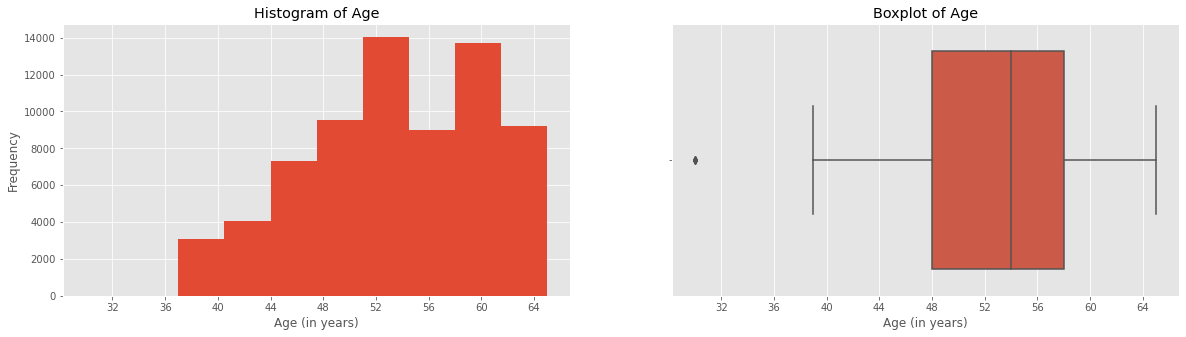

In [187]:

fig_1 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_1.add_subplot(121)
chart_2 = fig_1.add_subplot(122)

chart_1.hist(df_clean["age"])
chart_1.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_1.set_title('Histogram of Age')
chart_1.set_xlabel('Age (in years)')
chart_1.set_ylabel('Frequency')

sns.boxplot(x="age", data=df_clean, ax=chart_2)
chart_2.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_2.set_title('Boxplot of Age')
chart_2.set_xlabel('Age (in years)')


plt.show()

`Age` has relatively few outliers but is slightly right-skewed.

#### Height

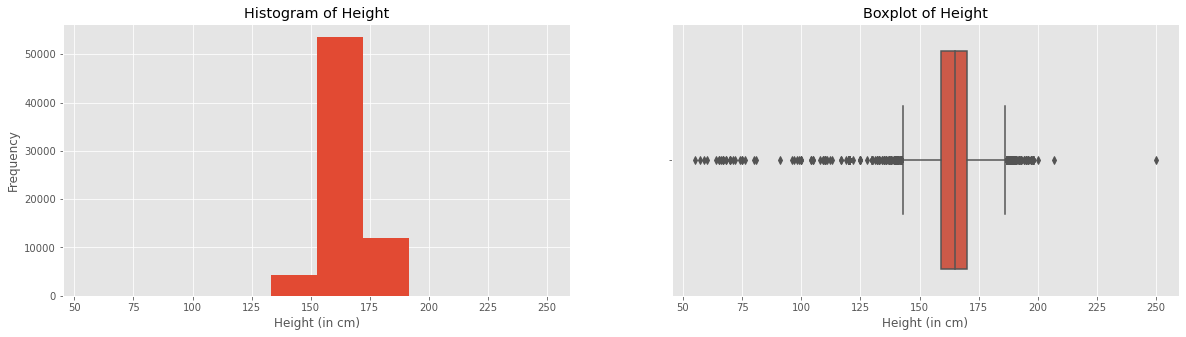

In [188]:

fig_2 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_2.add_subplot(121)
chart_2 = fig_2.add_subplot(122)

chart_1.hist(df_clean["height"])
chart_1.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_1.set_title('Histogram of Height')
chart_1.set_xlabel('Height (in cm)')
chart_1.set_ylabel('Frequency')

sns.boxplot(x="height", data=df_clean, ax=chart_2)
chart_2.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_2.set_title('Boxplot of Height')
chart_2.set_xlabel('Height (in cm)')


plt.show()

There are quite a few outliers in the height column that should be addressed.  The largest of 250cm is over 8 feet tall and appears to be an error.

#### Weight

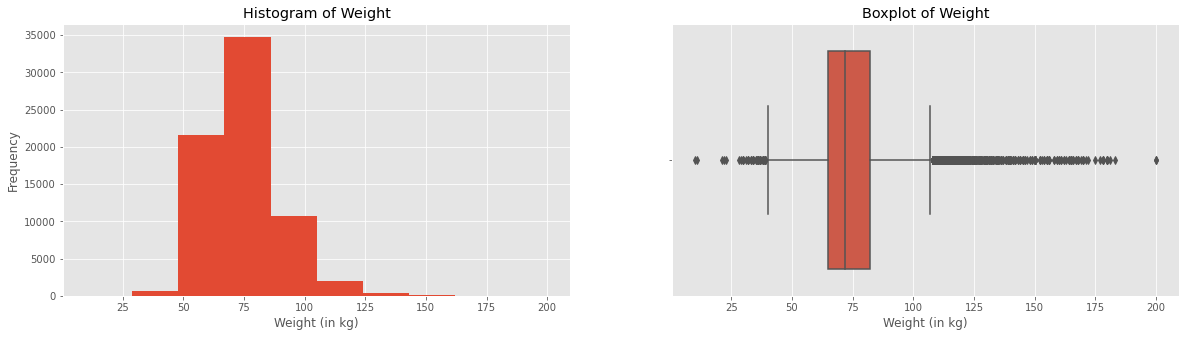

In [189]:

fig_3 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_3.add_subplot(121)
chart_2 = fig_3.add_subplot(122)

chart_1.hist(df_clean["weight"])
chart_1.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_1.set_title('Histogram of Weight')
chart_1.set_xlabel('Weight (in kg)')
chart_1.set_ylabel('Frequency')

sns.boxplot(x="weight", data=df_clean, ax=chart_2)
chart_2.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_2.set_title('Boxplot of Weight')
chart_2.set_xlabel('Weight (in kg)')


plt.show()

Similarly, there are a lot of outliers in the weight column as well.

#### Systolic blood pressure (ap_hi)

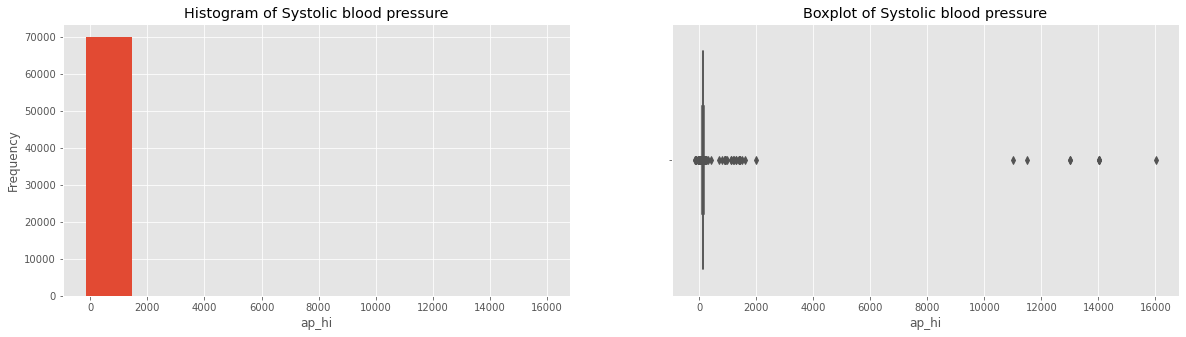

In [190]:

fig_4 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_4.add_subplot(121)
chart_2 = fig_4.add_subplot(122)

chart_1.hist(df_clean["ap_hi"])
chart_1.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_1.set_title('Histogram of Systolic blood pressure')
chart_1.set_xlabel('ap_hi')
chart_1.set_ylabel('Frequency')

sns.boxplot(x="ap_hi", data=df_clean, ax=chart_2)
chart_2.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_2.set_title('Boxplot of Systolic blood pressure')
chart_2.set_xlabel('ap_hi')


plt.show()

The distribution of the `Systolic blood pressure` was quite unusual with several readings that were likely erroneous.

In [191]:
df_clean["ap_hi"].sample(10)

id
71651    120
75183    130
41332    140
82833    120
22226    125
40731    120
33632    120
41249    110
53352    120
27959    120
Name: ap_hi, dtype: int64

A random sample show values within the expected range.

In [192]:
df_clean["ap_hi"].sort_values()

id
50055     -150
34295     -140
66571     -120
36025     -120
22881     -115
         ...  
36339    14020
66998    14020
67502    14020
36414    14020
58374    16020
Name: ap_hi, Length: 69976, dtype: int64

But there were negative values and extremely high ones that should be reviewed.  We'll address these outliers later within the imputation section.

In [193]:
# df_clean = df_clean[~(df_clean['ap_hi'] < 40) & (df_clean['ap_hi'] < 300)]
# df_clean.shape[0]

#### Diastolic blood pressure (ap_lo)

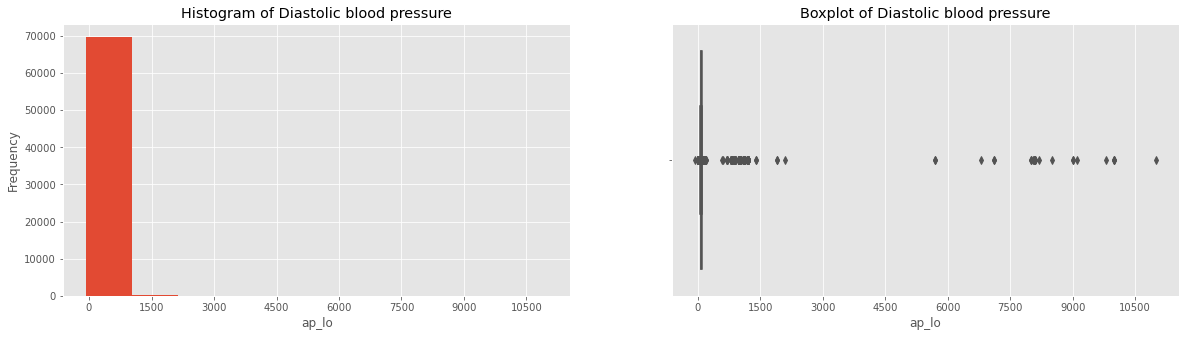

In [194]:

fig_5 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_5.add_subplot(121)
chart_2 = fig_5.add_subplot(122)

chart_1.hist(df_clean["ap_lo"])
chart_1.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_1.set_title('Histogram of Diastolic blood pressure')
chart_1.set_xlabel('ap_lo')
chart_1.set_ylabel('Frequency')

sns.boxplot(x="ap_lo", data=df_clean, ax=chart_2)
chart_2.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_2.set_title('Boxplot of Diastolic blood pressure')
chart_2.set_xlabel('ap_lo')


plt.show()

In [195]:
df_clean["ap_lo"].sample(10)


id
27214     80
47485    100
24617     60
20781     80
18517     80
51082     90
51709     90
67959     70
96500     70
12594     80
Name: ap_lo, dtype: int64

In [196]:
df_clean["ap_lo"].sort_values()

id
85816      -70
98095        0
45400        0
75007        0
81298        0
         ...  
62058     9800
34098    10000
3352     10000
97907    10000
61901    11000
Name: ap_lo, Length: 69976, dtype: int64

The same technique should be applied to the `ap_lo` feature.

### Categorical Variables

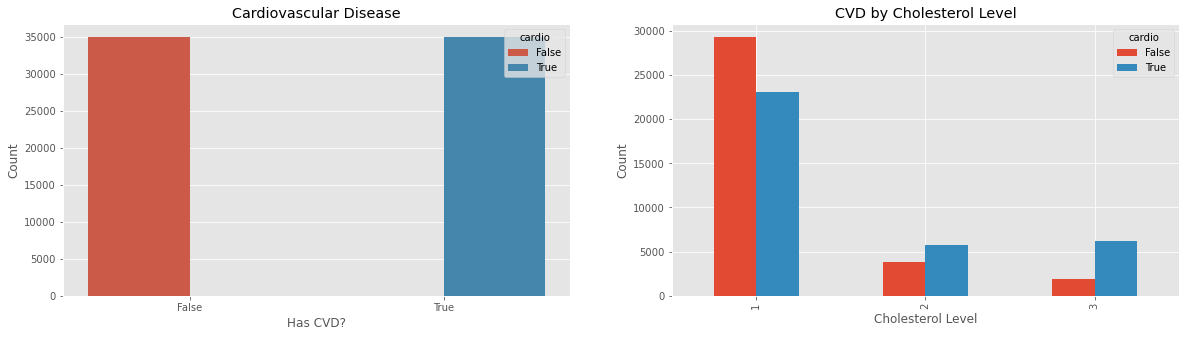

In [197]:
fig_0 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_0.add_subplot(121)
chart_2 = fig_0.add_subplot(122)

sns.countplot(x="cardio", hue="cardio", data=df_clean, ax=chart_1)
# chart_1.legend(bbox_to_anchor=(1,1), title='CVD')
chart_1.set_title('Cardiovascular Disease')
chart_1.set_xlabel('Has CVD?')
chart_1.set_ylabel('Count')

pd.crosstab(df_clean["cholesterol"], df_clean["cardio"]).plot(kind="bar", ax=chart_2)
chart_2.set_title('CVD by Cholesterol Level')
chart_2.set_xlabel('Cholesterol Level')
chart_2.set_ylabel('Count')


plt.show()

The Cardiovascular Disease (CVD) response variable is equally distributed.  The presence or absence of CVD does seem to change with the cholesterol levels.

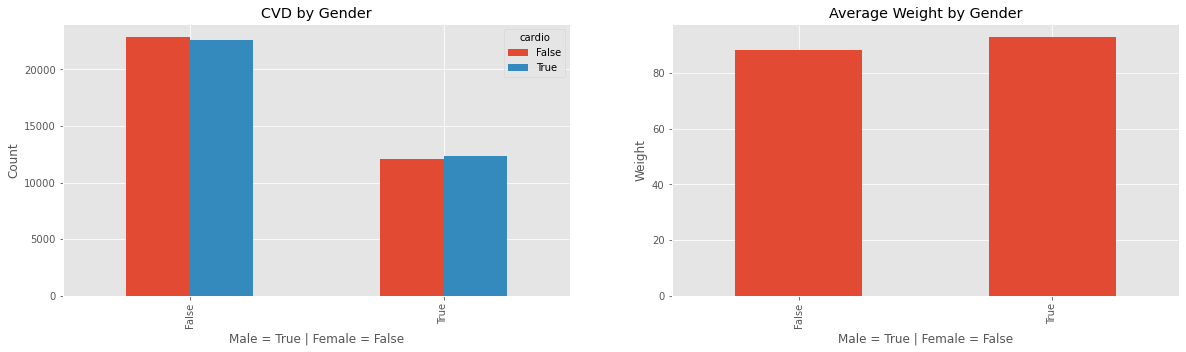

In [198]:

fig_6 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_6.add_subplot(121)
chart_2 = fig_6.add_subplot(122)

pd.crosstab(df_clean["gender"], df_clean["cardio"]).plot(kind="bar", ax=chart_1)
chart_1.set_title('CVD by Gender')
chart_1.set_xlabel('Male = True | Female = False')
chart_1.set_ylabel('Count')

df_clean.groupby(['gender', 'height']).sum().reset_index()  

df_clean.groupby(['gender', 'weight']).mean().reset_index().groupby('gender')['weight'].mean().plot(kind='bar', ax=chart_2)
chart_2.set_title('Average Weight by Gender')
chart_2.set_xlabel('Male = True | Female = False')
chart_2.set_ylabel('Weight')


plt.show()

There are more subjects with the `False` in the study than those with `True`.

We're going to assume that True is for male as the mean weight is slightly heigher for that category.

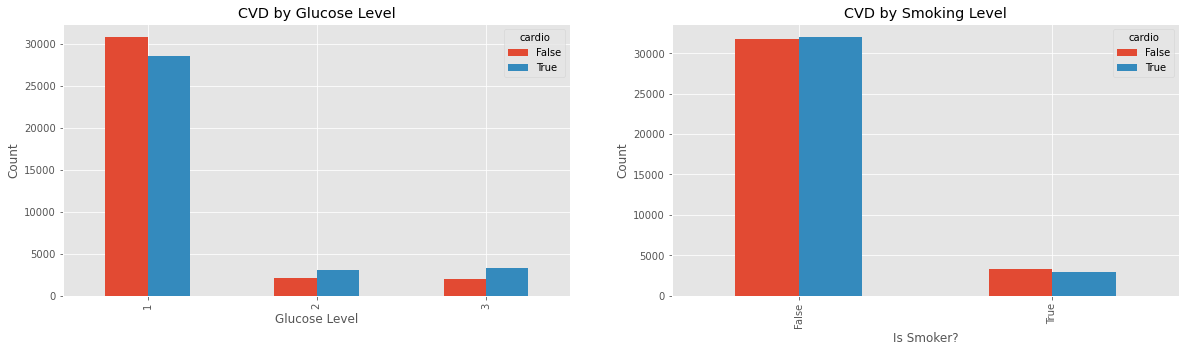

In [199]:
fig_7 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_7.add_subplot(121)
chart_2 = fig_7.add_subplot(122)

pd.crosstab(df_clean["gluc"], df_clean["cardio"]).plot(kind="bar", ax=chart_1)
chart_1.set_title('CVD by Glucose Level')
chart_1.set_xlabel('Glucose Level')
chart_1.set_ylabel('Count')


pd.crosstab(df_clean["smoke"], df_clean["cardio"]).plot(kind="bar", ax=chart_2)
chart_2.set_title('CVD by Smoking Level')
chart_2.set_xlabel('Is Smoker?')
chart_2.set_ylabel('Count')


plt.show()

The presence or absence of CVD also changes with the glucose levels but suprsingly not with smoking.

In [200]:
df_clean.groupby(['gluc', 'cardio']).size().unstack(fill_value=0)

cardio  False  True 
gluc                
1       30877  28578
2        2112   3078
3        2015   3316

There are only a few thousand entries within levels 2 and 3 of the Choleserol column.

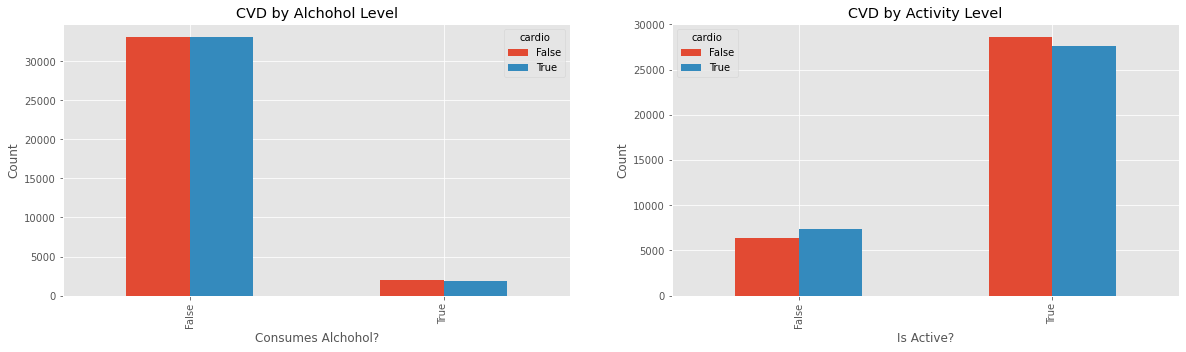

In [201]:
fig_8 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_8.add_subplot(121)
chart_2 = fig_8.add_subplot(122)

pd.crosstab(df_clean["alco"], df_clean["cardio"]).plot(kind="bar", ax=chart_1)
chart_1.set_title('CVD by Alchohol Level')
chart_1.set_xlabel('Consumes Alchohol?')
chart_1.set_ylabel('Count')


pd.crosstab(df_clean["active"], df_clean["cardio"]).plot(kind="bar", ax=chart_2)
chart_2.set_title('CVD by Activity Level')
chart_2.set_xlabel('Is Active?')
chart_2.set_ylabel('Count')


plt.show()

Also suprising is that the `Alcohol level` didn't seem to have an impact on the response variable.  The `Activity Level` did show good seperation.

## Imputation

#### Age

In [202]:
median_age = df_clean['age'].median()

In [203]:
age_outlier_ids = df_clean.index[(np.abs(df_clean['age'] - df_clean['age'].mean()) > (3 * df_clean['age'].std()))]

In [204]:
df_clean.loc[df_clean.index.isin(age_outlier_ids), "age"] = median_age

In [205]:
df_clean.loc[df_clean.index.isin(age_outlier_ids)].head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                            
8850   54.0   False     175    59.0    120     80            1     1  False   
31922  54.0    True     175    92.0    100     60            1     1  False   
43842  54.0   False     159    59.0    120     80            1     1  False   
79749  54.0   False     160    59.0    110     70            1     1  False   

        alco  active  cardio  
id                            
8850   False    True   False  
31922  False    True   False  
43842  False    True   False  
79749  False    True   False

We've imputed observations with an `age` of more than `three standard deviations` from the mean with the median value. (~4 observations in total)  These may well have been valid observations but we wanted our model to extend well to other new and unseen data sets.

#### Height

In [206]:
median_height = df_clean['height'].median()

In [207]:
height_outlier_ids = df_clean.index[(np.abs(df_clean['height'] - df_clean['height'].mean()) > (3 * df_clean['height'].std()))]


In [208]:
df_clean.loc[df_clean.index.isin(height_outlier_ids), "height"] = median_height

In [209]:
df_clean.loc[df_clean.index.isin(height_outlier_ids)].head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                           
309   60.0    True   165.0    55.0    120     80            1     1  False   
1432  42.0    True   165.0   111.0    148     86            1     1  False   
1554  61.0    True   165.0    68.0    120     80            1     1  False   
3049  44.0    True   165.0    74.0    140     90            1     1   True   
3399  62.0    True   165.0    52.0    140    100            1     1  False   

       alco  active  cardio  
id                           
309   False    True   False  
1432  False    True    True  
1554  False    True    True  
3049   True    True    True  
3399  False    True    True

We've imputed observations with a `height` more than three standard deviations from the mean with the median value. (~287 observations in total)

#### Weight

In [210]:
median_weight = df_clean['weight'].median()

In [211]:
weight_outlier_ids = df_clean.index[(np.abs(df_clean['weight'] - df_clean['weight'].mean()) > (3 * df_clean['weight'].std()))]


In [212]:
df_clean.loc[df_clean.index.isin(weight_outlier_ids), "weight"] = median_weight


In [213]:
df_clean.loc[df_clean.index.isin(weight_outlier_ids)].head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
474  58.0   False   157.0    72.0    120     80            1     1  False   
552  46.0    True   165.0    72.0    120     80            1     1  False   
618  46.0   False   186.0    72.0    130     70            1     1  False   
634  58.0    True   178.0    72.0    160     90            1     3  False   
846  40.0   False   164.0    72.0    130     90            1     1  False   

      alco  active  cardio  
id                          
474  False    True    True  
552  False    True   False  
618  False   False   False  
634  False    True    True  
846  False   False   False

The same method was applied to the 702 `weight` outliers.

#### Systolic blood pressure (ap_hi)

In [214]:
median_ap_hi = df_clean['ap_hi'].median()

In [215]:
ap_hi_outlier_ids = df_clean.index[(np.abs(df_clean['ap_hi'] - df_clean['ap_hi'].mean()) > (3 * df_clean['ap_hi'].std()))]


In [216]:
df_clean.loc[df_clean.index.isin(ap_hi_outlier_ids), "ap_hi"] = median_ap_hi

In [217]:
df_clean.loc[df_clean.index.isin(ap_hi_outlier_ids)].head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                            
2654   41.0   False   160.0    60.0  120.0     60            1     1  False   
2845   62.0    True   167.0    59.0  120.0      0            1     1  False   
6822   40.0   False   168.0    63.0  120.0     60            2     1  False   
11089  58.0   False   175.0    80.0  120.0     90            1     1  False   
12710  52.0   False   164.0    75.0  120.0     80            2     1  False   

        alco  active  cardio  
id                            
2654   False    True   False  
2845   False    True   False  
6822   False    True   False  
11089  False    True    True  
12710  False    True    True

In [218]:
ap_hi_outlier_ids2 = df_clean.index[(df_clean['ap_hi'] < 40) | (df_clean['ap_hi'] > 300)]


In [219]:
df_clean.loc[df_clean.index.isin(ap_hi_outlier_ids2), "ap_hi"] = median_ap_hi

Even after handling the `ap_hi` outliers through the standard deviation method, there were still some unusual entries that were manually addressed.  (readings less that 40 or greater than 300)

#### Diastolic blood pressure (ap_lo)

In [220]:
median_ap_lo = df_clean['ap_lo'].median()

In [221]:
ap_lo_outlier_ids = df_clean.index[(np.abs(df_clean['ap_lo'] - df_clean['ap_lo'].mean()) > (3 * df_clean['ap_lo'].std()))]

In [222]:
df_clean.loc[df_clean.index.isin(ap_lo_outlier_ids), "ap_lo"] = median_ap_lo

In [223]:
df_clean.loc[df_clean.index.isin(ap_lo_outlier_ids)].head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
314  48.0    True   183.0    98.0  160.0   80.0            1     2   True   
334  60.0    True   157.0    60.0  160.0   80.0            2     1  False   
357  50.0   False   150.0    83.0  140.0   80.0            1     1  False   
458  64.0   False   176.0    63.0  160.0   80.0            2     2  False   
482  51.0   False   154.0    81.0  140.0   80.0            2     1  False   

      alco  active  cardio  
id                          
314  False    True    True  
334  False   False    True  
357  False    True    True  
458  False   False    True  
482  False    True    True

In [224]:
ap_lo_outlier_ids2 = df_clean.index[(df_clean['ap_lo'] < 40) | (df_clean['ap_lo'] > 300)]

In [225]:
df_clean.loc[df_clean.index.isin(ap_lo_outlier_ids2), "ap_lo"] = median_ap_lo

The `ap_lo` feature needed similar processing.

# Simple Statistics


In [226]:
df_clean.describe()

age        height        weight         ap_hi         ap_lo  \
count  69976.000000  69976.000000  69976.000000  69976.000000  69976.000000   
mean      53.340317    164.411884     73.643909    126.981551     81.365125   
std        6.763333      7.708061     13.193980     17.075701      9.624691   
min       39.000000    140.000000     32.000000     60.000000     40.000000   
25%       48.000000    159.000000     65.000000    120.000000     80.000000   
50%       54.000000    165.000000     72.000000    120.000000     80.000000   
75%       58.000000    170.000000     81.000000    140.000000     90.000000   
max       65.000000    188.000000    117.000000    240.000000    190.000000   

        cholesterol          gluc  
count  69976.000000  69976.000000  
mean       1.366997      1.226535  
std        0.680333      0.572353  
min        1.000000      1.000000  
25%        1.000000      1.000000  
50%        1.000000      1.000000  
75%        2.000000      1.000000  
max        3.000000      3.000000

In the table above we have an overview of all of our attributes included in the dataset. This gives an idea of our counts after the cleaning of our data and provides us with data we can hope to draw inferences from. Below we will look at the simplest level of some ofour attributes to review if some general assumptions are true or false within our given data.

In [227]:
df_clean.agg({'age':['min','max','median','skew','std'],'gender':['min','max','median','skew','std'],'height':['min','max','median','skew','std'],'weight':['min','max','median','skew','std'],'ap_hi':['min','max','median','skew','std'],'ap_lo':['min','max','median','skew','std']})


age    gender      height      weight       ap_hi       ap_lo
min     39.000000     False  140.000000   32.000000   60.000000   40.000000
max     65.000000      True  188.000000  117.000000  240.000000  190.000000
median  54.000000         0  165.000000   72.000000  120.000000   80.000000
skew    -0.305042  0.630605    0.088790    0.550598    0.918609    0.680160
std      6.763333  0.476862    7.708061   13.193980   17.075701    9.624691

This table narrows down our quantitative variables, giving us a quick look at the balanceof the dataset. The variable "skew" helps us see in which way our observations lean, none of which were too far out of preferred parameters. We noticed that age of our population is slightly younger (leaning towards our min of 39), gender favors men slightly (as it is a higher value and 2 represents male), height is almost indiscernible, weight favors our max slightly, and blood pressure is slightly higher in our dataset. As stated previously, with the clean data we feel comfortable making assumptions from this data and have decided to move forward.

In [228]:
df_clean.groupby("cholesterol").mean()

age    gender      height     weight       ap_hi  \
cholesterol                                                           
1            52.831879  0.359275  164.653272  72.626377  125.074903   
2            53.712326  0.329459  163.912452  75.766443  131.291444   
3            56.200471  0.311059  163.436152  77.736511  134.256385   

                 ap_lo      gluc     smoke      alco    active    cardio  
cholesterol                                                               
1            80.524875  1.099139  0.085235  0.048089  0.802353  0.440175  
2            83.085140  1.335218  0.105666  0.076134  0.799037  0.602157  
3            84.783412  1.924870  0.086412  0.064344  0.818125  0.765435

Cholesterol has been a topic of debate for years given advancements in technology. We felt that this would possibly give us some insight into the weight that it would have in regards to classifying cardiovascular disease. This attribute classifies 1 as normal levels of cholesterol, 2 as being above normal, and 3 being well above normal

In [229]:
df_clean.groupby("smoke").mean()

age    gender      height     weight       ap_hi      ap_lo  \
smoke                                                                      
False  53.441221  0.299513  163.941166  73.374581  126.832824  81.293510   
True   52.296645  0.868212  169.280597  76.429616  128.519857  82.105852   

       cholesterol      gluc      alco    active    cardio  
smoke                                                       
False     1.364819  1.227389  0.029934  0.800523  0.502186  
True      1.389528  1.217701  0.300535  0.836764  0.474793

As made clear from numerous medical studies, smoking can greatly affect health. In thisattribute we hold that 0 is a non-smoker and 1 is a smoker. We observed here that height was higher in the smoking population (which could be attributed to more male smokers than females). Weight was slightly higher which could also correspond with the skewed height, but it is also known that smokers do generally weigh more than non-smokers from previous medical studies. What was most expected is that the overall blood pressure (both diastolic and systolic) were both higher than non-smokers.

In [230]:
df_clean.groupby("active").mean()

age    gender      height     weight       ap_hi      ap_lo  \
active                                                                      
False   53.473244  0.343939  164.542774  74.082461  126.954277  81.372552   
True    53.307854  0.351043  164.379919  73.536808  126.988211  81.363311   

        cholesterol      gluc     smoke      alco    cardio  
active                                                       
False      1.353331  1.234365  0.073316  0.042155  0.535857  
True       1.370335  1.224623  0.091784  0.056631  0.490959

Lastly, we wanted to evaluate the physical activity of our population. This attribute's levels are 0 for non-active and 1 for active. What was curious about this attribute is thatthe age is not skewed towards either older nor younger. Only ever so slightly is the age skewed towards younger persons, but generally physical activity is not determined by age through this dataset, where normally we'd expect as a population ages, they become less active.Weight was another variable we felt we'd expect to see a difference between active andnon-active. Here we did find this to be true as those who are active were approximately a half kilogram lighter than non-active. This wasn't as great as we would have expected,but it does prove our general assumption. Additionally, we'd really expect the systolic and diastolic blood pressures to be affected by this variable, however there was notable nearly no change here as well. From this table, we'd draw a conclusion that physical activity does not necessarily help prevent or predict cardiovascular disease, but much more investigation is required to prove or disprove this entirely as well.

# Visualize Attributes


## 3D Scatterplot

In [231]:
fig = px.scatter_3d(df_clean.sample(200), x='ap_hi', y='ap_lo', z='age',
              color='cardio')

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))


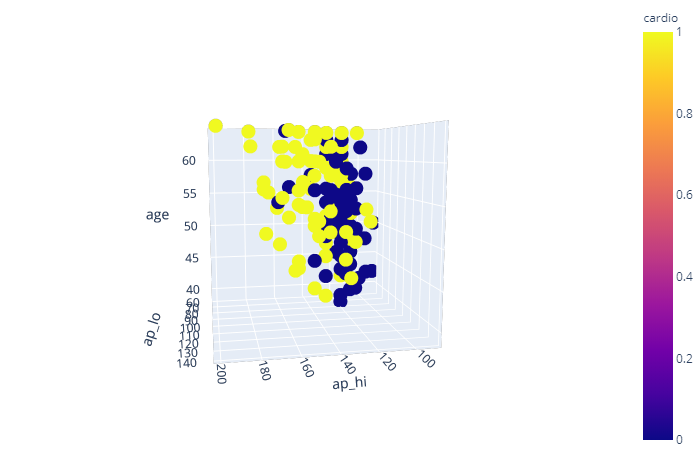

In [232]:
import base64, io, IPython
from PIL import Image as PILImage

image = PILImage.open("../img/3d_scatterplot.png")

output = io.BytesIO()
image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

In [233]:
## PDF OUTPUT ONLY
# <img src = "../img/3d_scatterplot.png" >

The 3D scatterplot shows higher CVD response rates from `ap_hi` and `ap_lo` but not for `age`.  <span style="color:red">The relative unimportance of the age variable was seen earlier from the clustered bar charts, but visualizing the information in three dimensions makes this more pronounced when compared with variables that do correlate with one having Cardiovascular Disease or not, such as Systolic blood pressure (ap_hi) and Diastolic blood pressure (ap_lo).</span>

## Kernal Density Plot

C:\Users\Chance\anaconda3\envs\ML7331\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



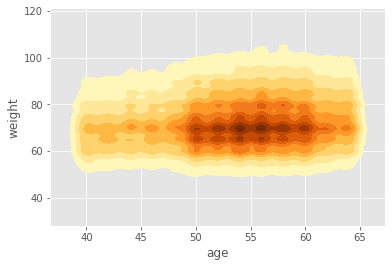

In [234]:
df_sub3 = df_clean[['age', 'weight', 'cholesterol', 'ap_hi', 'cardio', 'ap_lo', 'smoke', 'active']].copy()
df_sub3.cardio = df_sub3.cardio=='1' 
#Adapted from https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57
ax = sns.kdeplot(df_sub3['age'], df_sub3['weight'],
                  cmap="YlOrBr", shade=True, shade_lowest=False)


The above Kernal Density plot depicts the density of those with cardiovascular disease by age and weight.  As can be seen, the most dense areas are shown with an age value of 54-56 and a weight value of about 70.  This may be indicative of ages and weights that may be predictive of cardiovascular disease.

## Histograms

The five histograms below on our numerical features shows some interesting details. It appears there are some missing values in the the distribution. For example, there appear to be quanitized readings for age and blood pressure.

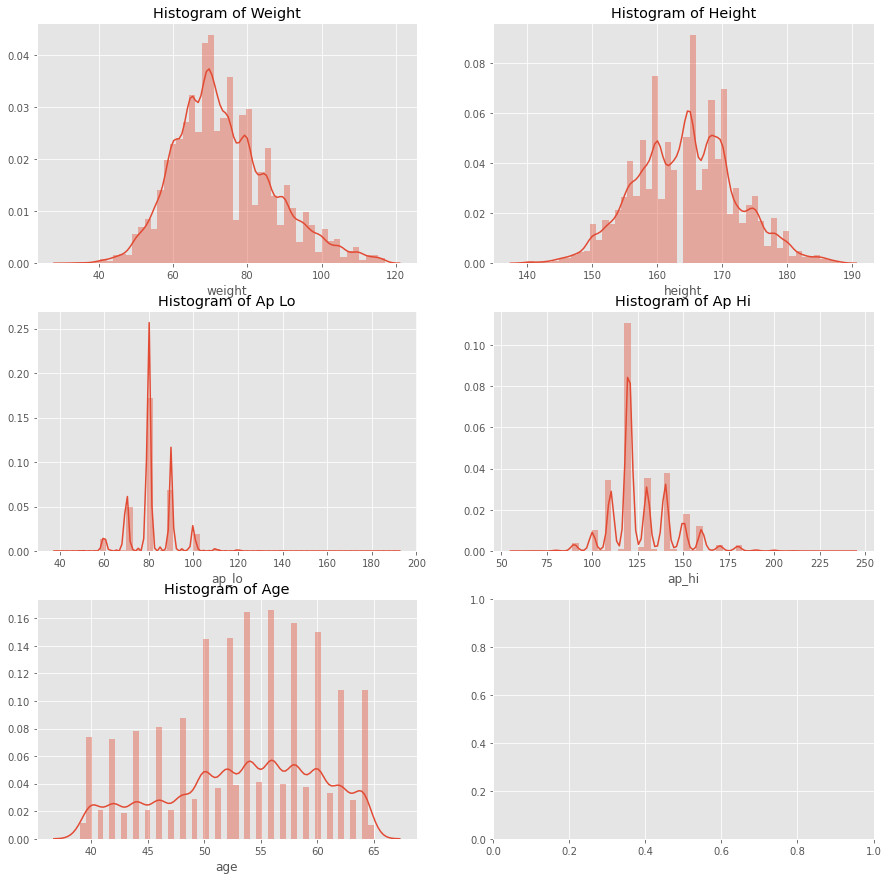

In [235]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2, figsize=(15,15))

sns.distplot(df_clean.weight, ax=ax1).set_title("Histogram of Weight")
sns.distplot(df_clean.height, ax=ax2).set_title("Histogram of Height")
sns.distplot(df_clean.ap_lo, ax=ax3).set_title("Histogram of Ap Lo")
sns.distplot(df_clean.ap_hi, ax=ax4).set_title("Histogram of Ap Hi")
sns.distplot(df_clean.age, ax=ax5).set_title("Histogram of Age")

plt.show()

# Explore Joint Attributes


We can create a feature correlation heatmap using Seaborn. Please note, we used a mask below to set correlations less than .2 to 0, for a better visualization.



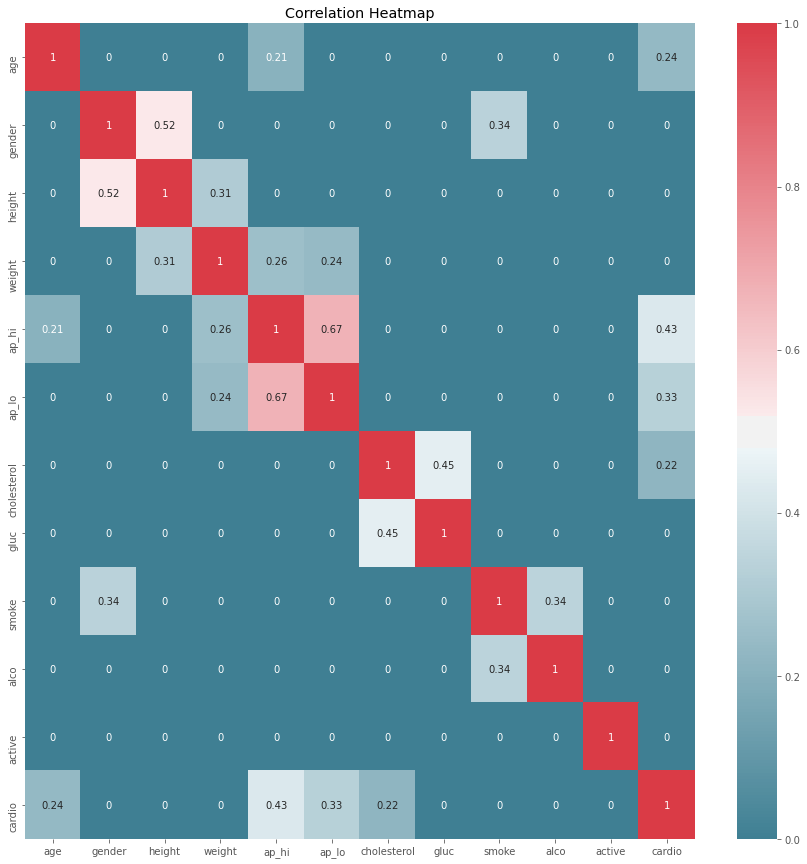

In [236]:
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

plt.figure(figsize=(15,15))

# Use an easier to see colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Mask
correlation = df_clean[features].corr()
correlation[np.abs(correlation)<.2] = 0

sns.heatmap(correlation, annot = True, cmap=cmap).set(title = 'Correlation Heatmap')
plt.show()

The above heatmap shows some interesting correlations, namely between

* Height and Gender
* Gender and Smoking
* Alcohol and Smoking
* Glucose and Cholesterol

Additionally, we see the following are correlated with out target variable, 'cardio'.

* Age
* Blood Pressure (High/Low)
* Cholesterol

Let's cross tabulate a few of these and inspect further.

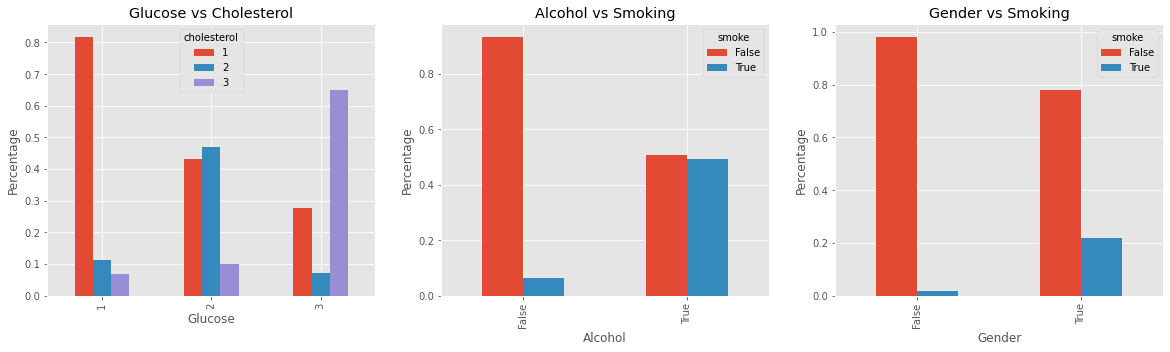

In [237]:
fig = plt.figure(1, figsize=(20, 5))

chart_1 = fig.add_subplot(131)
chart_2 = fig.add_subplot(132)
chart_3 = fig.add_subplot(133)

pd.crosstab(df_clean["gluc"], df_clean["cholesterol"]).apply(lambda r: r/r.sum(), axis=1).plot(kind="bar", ax=chart_1)
chart_1.set_title('Glucose vs Cholesterol')
chart_1.set_xlabel('Glucose')
chart_1.set_ylabel('Percentage')


pd.crosstab(df_clean["alco"], df_clean["smoke"]).apply(lambda r: r/r.sum(), axis=1).plot(kind="bar", ax=chart_2)
chart_2.set_title('Alcohol vs Smoking')
chart_2.set_xlabel('Alcohol')
chart_2.set_ylabel('Percentage')

pd.crosstab(df_clean["gender"], df_clean["smoke"]).apply(lambda r: r/r.sum(), axis=1).plot(kind="bar", ax=chart_3)
chart_3.set_title('Gender vs Smoking')
chart_3.set_xlabel('Gender')
chart_3.set_ylabel('Percentage')

plt.show()

Some observations based on the above charts:

* We see above that glucose and cholesterol trend nicely. That is, if you are a x in one group, you are likely to be the same value in the other group.
* If you are a drinker, you are more than likely a smoker too.
* If you are a male, you are more likely a smoker in this group.

# Explore Attributes and Class



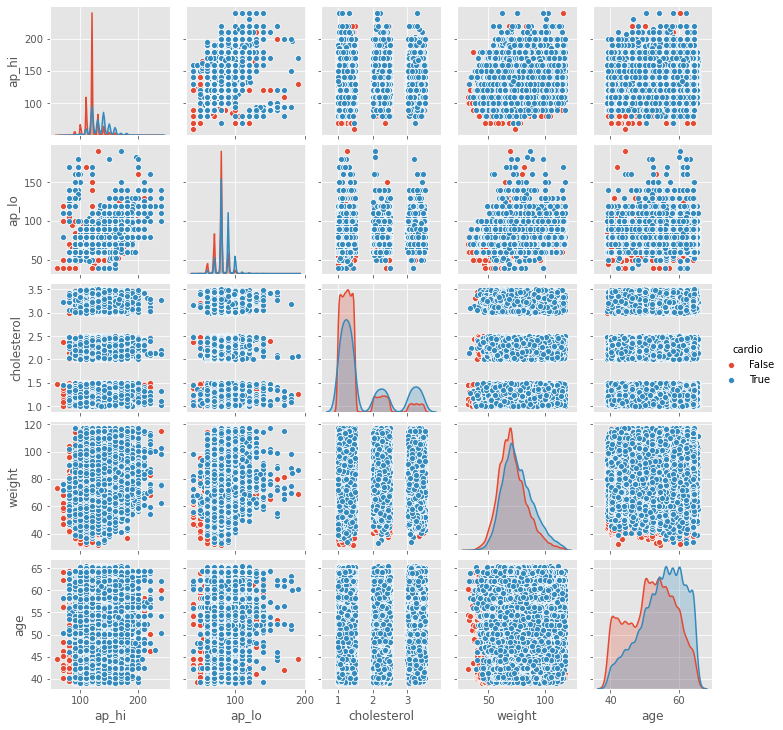

In [238]:
#Scatterplot Matrix
cmap = sns.diverging_palette(220, 10, as_cmap=True)

df_clean_jitter = df_clean[['cardio', 'ap_hi', 'ap_lo', 'cholesterol', 'weight', 'age']].copy()
df_clean_jitter[['cholesterol', 'age', 'weight']] = df_clean_jitter[['cholesterol', 'age', 'weight']].values + np.random.rand(len(df_clean_jitter),3)/2 
sns.pairplot(df_clean_jitter, hue="cardio", height=2)

plt.show()

The above pairwise scatter plot depicts the distribtuions of each of those that had cardiovascular disease and those that did not for each attribute across the center diagonal. As show in those distributions, there are apparent differences in those that had cardiovascular disease and those that did not. For example, as will be discussed in more, below details, the distrbutions show that as blood pressure, cholesterol, weight and age increase, the number of those that had cardiovascular disease also increases. In addition, the pairwise scatter plot shows scatterplot distrbutions between each of the attributes. Some seperation between those that had cardiovasular disease and those that did not can be seen in the plots between weight and age, cholesterol and weight, and age and blood pressure, despite the presence of some values seemingly ranndomly distributed. Therefore, these attributes may be indicative of cardiovascular disease.

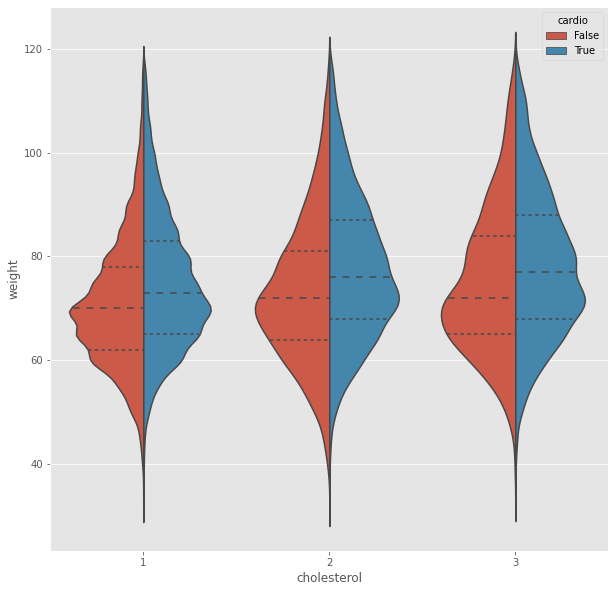

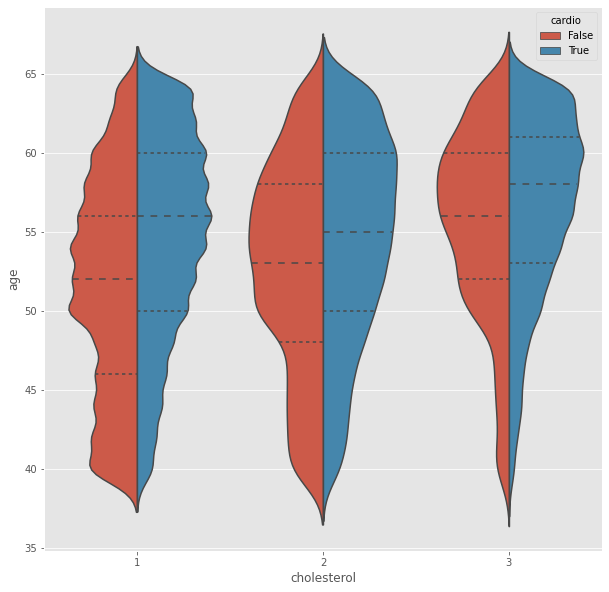

In [239]:
f, ax = plt.subplots(figsize=(10, 10))

sns.violinplot(x="cholesterol", y="weight", hue="cardio", data=df_clean, 
               split=True, inner="quart")

f, ax = plt.subplots(figsize=(10, 10))

sns.violinplot(x="cholesterol", y="age", hue="cardio", data=df_clean, 
               split=True, inner="quart")

The above violin plots show the relationship between cholesterol and weight between groups having cardiovascular disease (1), and not having cardiovascular disease.  The violin plots show that as the level of cholesterol increases from 1-3, the median difference in weight between the cardiovascular and non-cardiovascular disease groups also increases.  It is also apparent that the median weight for cholesterol levels 2-3 for each group represents an increase from cholesterol level 1.  This is consistent with the understanding that as cholesterol levels increase, weight also increases.

The violin plots depicting cholesterol and age shows that the distribution between those that had cardiovascular disease and those that did not is consistent across cholesterol levels 2 and 3.  For example, the difference between the median ages of those that had cardiovasular disease and those that did not for cholesterol levels 2-3 is approximately equal.  This is consistent with that people typically increase cholesterol levels with age as activites such as exercise decrease.  However, in the distributions between those that had cardiovascular disease and those that did not for cholesterol level 1 shows that age is a potential indicator of cardiovascular disease.  The distrbution that had cardiovascular disease at cholesterol level 1 is approximately 56, which is potentially, significantly greater than the median age of those that did not have cardiovascular disease at 52.

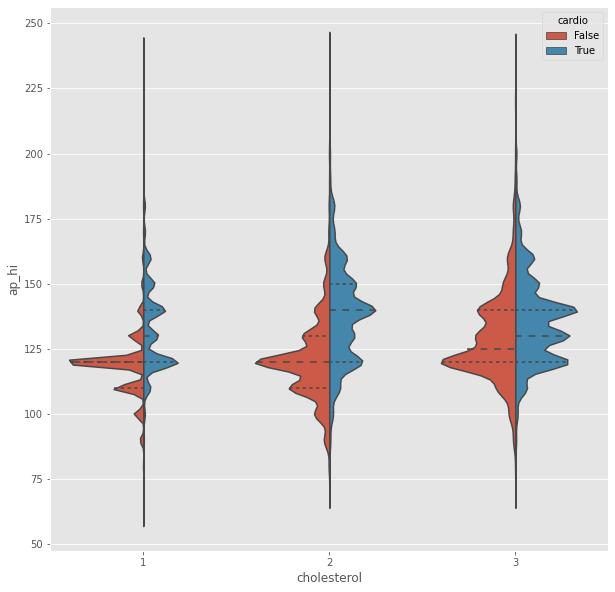

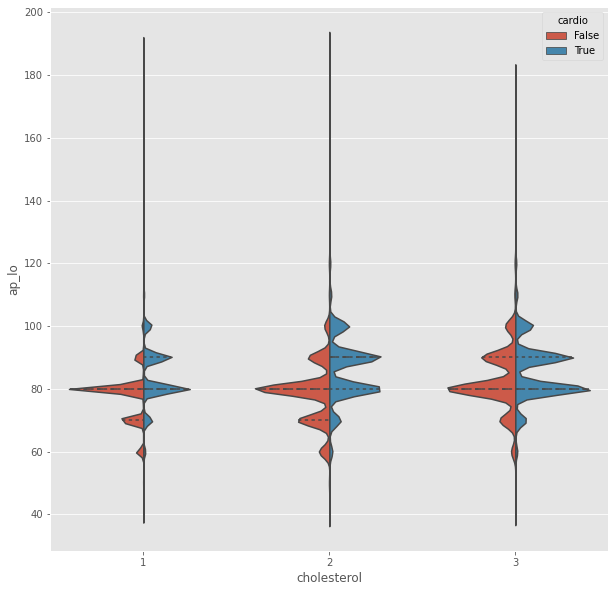

In [240]:
f, ax = plt.subplots(figsize=(10, 10))

sns.violinplot(x="cholesterol", y="ap_hi", hue="cardio", data=df_clean, 
               split=True, inner="quart")

f, ax = plt.subplots(figsize=(10, 10))

sns.violinplot(x="cholesterol", y="ap_lo", hue="cardio", data=df_clean, 
               split=True, inner="quart")

Violin plots of blood pressure and cholesterol between those that had and did not have cardiovascular disease appears to include multiple peaks. Otherwise, it appears that those with lower overall blood pressure, between low and high pressure values, suffered less cardiovascular disease. As can be seen, as both low and high blood pressure values increase, the distrbution of those with cardiovascular disease also increases. Therefore, it appears as if blood pressure is an indicator of cardiovascular disease.

In [241]:
import plotly.express as px

df_sub2 = df_clean[['age', 'weight', 'cholesterol', 'ap_hi', 'cardio', 'ap_lo']]
#Normalizing the data
df_normalized2 = (df_sub2-df_sub2.mean())/(df_sub2.std())
df_normalized2.cardio = df_sub2.cardio
df_normalized2.cholesterol = df_normalized2.cholesterol+np.random.rand(*df_normalized2.cholesterol.shape)/2
df_normalized2.ap_hi = df_normalized2.ap_hi+np.random.rand(*df_normalized2.ap_hi.shape)/2

fig = px.parallel_coordinates(df_sub2, color='cardio', labels={"age": "Age", "weight": "Weight", "cholesterol": "Cholesterol", "ap_hi": "High Blood Pressure Value",
               "cardio": "Cardiovascular Disease", "ap_lo": "Low Blood Pressure Value"},
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=1)
fig.show()

The above parallel coordinates plot shows interconnections between those that had cardiovascular disease and those that did not, and the attributes that appear to be indicators of cardiovascular disease.  Here, those with cardiovascular disease are shown in beige, and those without cardiovascular disease is shown in teal.  In the above plot, separation can be seen between age and weight around 43, suggesting that age and weight may interact in predicting cardiovascular disease.  Some separation between weight, cholesterol and high blood pressure indicating that as weight, cholesterol and high blood pressure values increase, cardiovascular disease also increases.  Lastly, as shown, there is more influence of cardiovascular disease as all of the attributes increase.

C:\Users\Chance\anaconda3\envs\ML7331\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



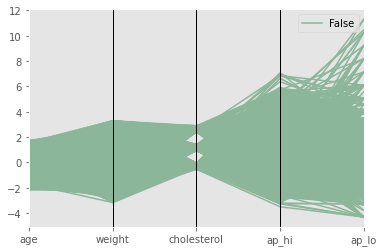

In [242]:
from pandas.plotting import parallel_coordinates


#df_sub2 = df_clean[['age', 'weight', 'cholesterol', 'ap_hi', 'cardio', 'ap_lo']]

df_sub = df_clean[['age', 'weight', 'cholesterol', 'ap_hi', 'cardio', 'ap_lo']].copy()
df_sub.cardio = df_sub.cardio=='1' 
#normalizing values
df_normalized = (df_sub-df_sub.mean())/(df_sub.std())
df_normalized.cardio = df_sub.cardio
df_normalized.cholesterol = df_normalized.cholesterol+np.random.rand(*df_normalized.cholesterol.shape)/2
df_normalized.ap_hi = df_normalized.ap_hi+np.random.rand(*df_normalized.ap_hi.shape)/2


parallel_coordinates(df_normalized,'cardio')

plt.show()

The above parallel coordinates plot shows the axes of the attrivutes for the group that includes cardiovascular disease.  Eliminating the group that does not have cardiovascular disease shows more detail after normalization.  For example, there appears to be age and weight bands that may be indicative of cardiovascular disease such that outside of this band is indicative of not having cardiovascular disease.  Lastly, while most of the axes are clustered 2 and -2, more axes extend from the high values of high and low blood pressure. This is indicative of an increase in cardiovascular disease as the values for high and low blood pressure increase, which also fits the domain knowledge of the problem.  

# New Features


## BMI

We can combine the height and weight features into a single feature, Body Mass Index. BMI can be calculated using the formula below. In general, we can see a higher instance of cardiovascular disease in patients with a higher BMI.

$BMI = Weight\;(kg)\;/\;Height\;(m^2)$

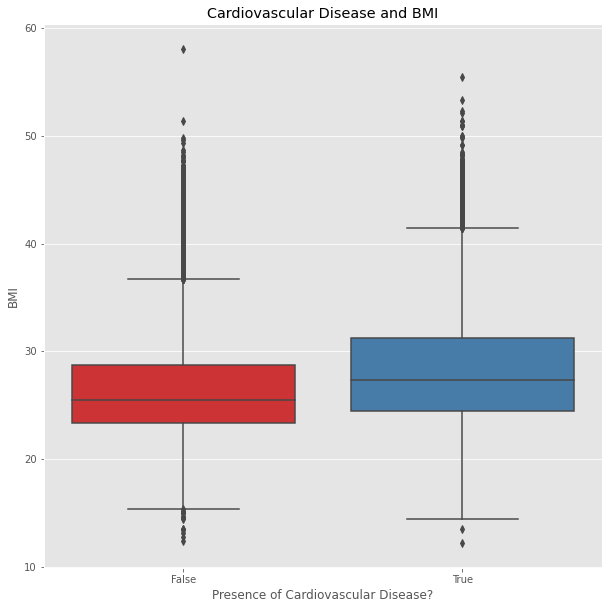

In [243]:
plt.figure(figsize=(10,10))

df_clean['bmi'] = df_clean['weight'] / (df_clean['height']/100)**2

sns.boxplot(x='cardio',
            y='bmi', 
            data=df_clean,
            palette="Set1").set(title = 'Cardiovascular Disease and BMI',
                               xlabel = 'Presence of Cardiovascular Disease?',
                               ylabel = 'BMI')

plt.show()

For entertainment, we can use some of what we learned in stats so that we don't forget, and do a ttest between the diseased and healthy group. It shows what would expect, that there is some statistical signficance in the mean difference of BMI between the two groups (healthy vs diseased).

In [244]:
from scipy import stats
import researchpy as rp

# Let's create 2 sets, one for disease, and another for healthy
disease = df_clean[df_clean['cardio'] == 1]
disease.reset_index(inplace = True)

healthy = df_clean[df_clean['cardio'] == 0]
disease.reset_index(inplace = True)

var='bmi'

# diff = disease[var] - healthy[var]
# stats.probplot(diff, plot= plt)
# plt.title('BMI P-P Plot') 
# stats.ttest_ind(disease[var], healthy[var]))

descriptives, results = rp.ttest(disease[var], healthy[var], equal_variances=False)
results

Welch's t-test     results
0  Difference (bmi - bmi) =       1.8505
1      Degrees of freedom =   69185.9581
2                       t =      51.2621
3   Two side test p value =       0.0000
4  Difference < 0 p value =       1.0000
5  Difference > 0 p value =       0.0000
6               Cohen's d =       0.3876
7               Hedge's g =       0.3876
8           Glass's delta =       0.3686
9                       r =       0.1913

We could also create a BMI category to represent the following four cases. [Source](https://www.cancer.org/cancer/cancer-causes/diet-physical-activity/body-weight-and-cancer-risk/adult-bmi.html)

* Underweight: BMI is less than 18.5.
* Normal weight: BMI is 18.5 to 24.9.
* Overweight: BMI is 25 to 29.9.
* Obese: BMI is 30 or more.

As expected, we can see from that a higher BMI group correlates with a higher chance of being diagnosed with cardiovascular disease.


In [245]:
df_clean['bmiGrp'] = np.where((df_clean.bmi < 18.5), 1, 0)
df_clean['bmiGrp'] = np.where((df_clean.bmi >= 18.5) & (df_clean.bmi < 25), 2, df_clean.bmiGrp)
df_clean['bmiGrp'] = np.where((df_clean.bmi >= 25) & (df_clean.bmi < 30), 3, df_clean.bmiGrp)
df_clean['bmiGrp'] = np.where((df_clean.bmi >= 30), 4, df_clean.bmiGrp)

df_grouped = df_clean.groupby(by=['bmiGrp'])
print ("Percentage of Caridovascular Disease in each BMI group:")
print (df_grouped.cardio.sum() / df_grouped.cardio.count() *100)

Percentage of Caridovascular Disease in each BMI group:
bmiGrp
1    26.917058
2    40.545001
3    51.286476
4    62.745980
Name: cardio, dtype: float64


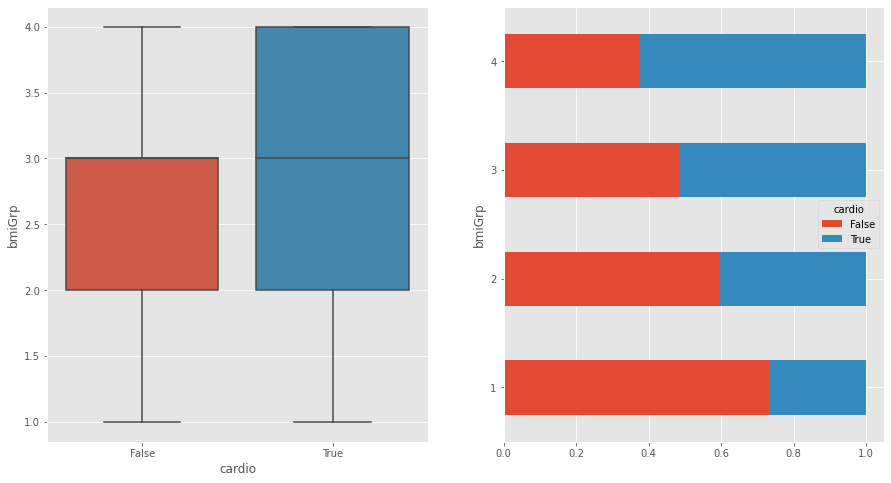

In [246]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

sns.boxplot(x='cardio', y='bmiGrp', data=df_clean, ax=ax1)
#sns.barplot(x='bp', y='cardio', data=df, ax=ax2)

cardio = pd.crosstab([df_clean['bmiGrp']],df_clean.cardio.astype(bool))
cardo_rate = cardio.div(cardio.sum(1).astype(float), axis=0) # normalize the value
cardo_rate.plot(kind='barh', stacked=True, ax=ax2)

plt.show()

## Blood Pressure Categories

We can also create a new feature to categorize the Blood Pressure values. [Source](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings)

<img src="https://www.heart.org/-/media/health-topics-images/hbp/blood-pressure-readings-chart-english.jpg"
     alt="Blood Pressure Categories"
     style="margin-right: 10px;" />

As with BMI Categories, we can see that a higher BP group corresponds to a higher chance of being diagnosed with cardiovascular disease.

In [247]:
# Create blood pressure categories

df_clean['bp'] = np.where((df_clean.ap_hi < 120) & (df_clean.ap_lo < 80), 1, 0)
df_clean['bp'] = np.where((df_clean.ap_hi >= 120) & (df_clean.ap_hi < 130) & (df_clean.ap_lo < 80), 2, df_clean.bp)
df_clean['bp'] = np.where((df_clean.ap_hi >= 130) & (df_clean.ap_hi < 140) | ((df_clean.ap_lo >= 80) & (df_clean.ap_lo < 90)), 3, df_clean.bp)
df_clean['bp'] = np.where((df_clean.ap_hi >= 140) | (df_clean.ap_lo >= 90), 4, df_clean.bp)
df_clean['bp'] = np.where((df_clean.ap_hi > 180) | (df_clean.ap_lo > 120), 5, df_clean.bp)

df_grouped = df_clean.groupby(by=['bp'])
print ("Percentage of cardio disease in each Blood Pressure group:")
print (df_grouped.cardio.sum() / df_grouped.cardio.count() *100)

Percentage of cardio disease in each Blood Pressure group:
bp
1    22.155939
2    32.253968
3    38.524389
4    78.158972
5    85.250000
Name: cardio, dtype: float64


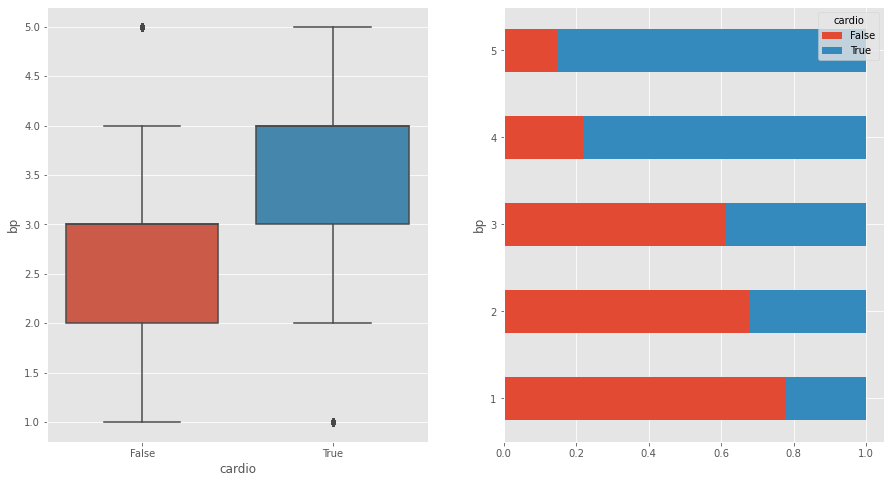

In [248]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

sns.boxplot(x='cardio', y='bp', data=df_clean, ax=ax1)
#sns.barplot(x='bp', y='cardio', data=df, ax=ax2)

cardio = pd.crosstab([df_clean['bp']],df_clean.cardio.astype(bool))
cardo_rate = cardio.div(cardio.sum(1).astype(float), axis=0) # normalize the value
cardo_rate.plot(kind='barh', stacked=True, ax=ax2)

plt.show()

Let's create a new feature correlation heatmap, but instead use the new features we created. In this case, we can see a better correlation between our groups for BMI and BP with respect to our reponse variable (cardio). Please note, we used a mask below to set correlations less than .2 to 0, for a better visualization.

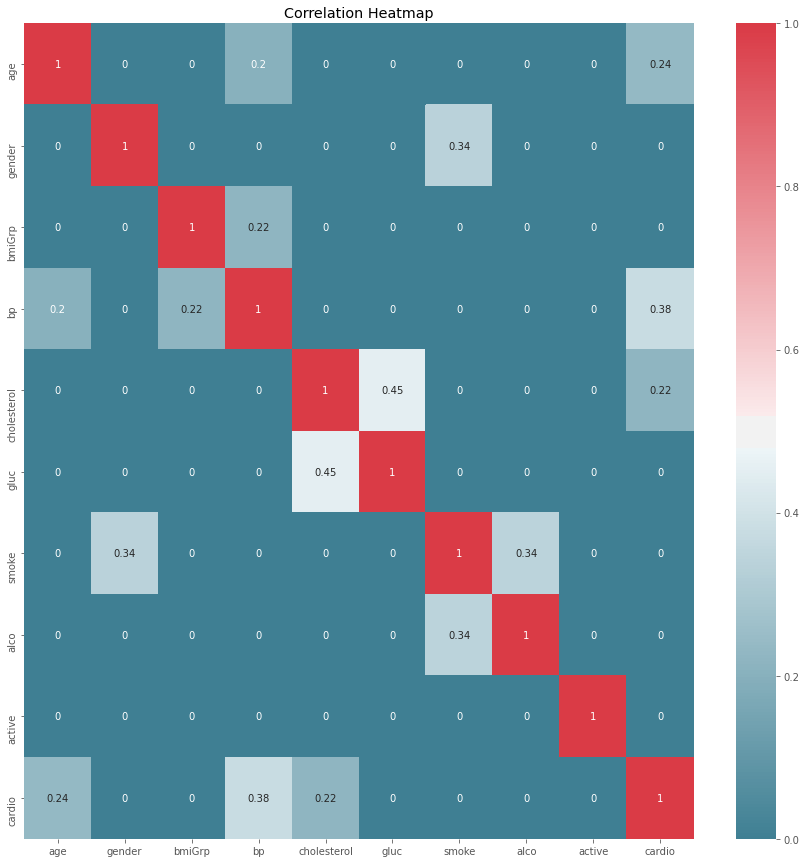

In [249]:
features = ['age', 'gender', 'bmiGrp', 'bp', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

plt.figure(figsize=(15,15))

# Use an easier to see colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlation = df_clean[features].corr()
correlation[np.abs(correlation)<.2] = 0

sns.heatmap(correlation, annot = True, cmap=cmap).set(title = 'Correlation Heatmap')
plt.show()

# Exceptional Work



#### Store feature matrix as an ndarray

In [250]:
# Full Model
X_cols = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
# *dcrouthamel - test with new features
# X_cols = ['age', 'gender', 'bmiGrp', 'bp', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
X = df_clean[X_cols].to_numpy()

In [251]:
type(X)

numpy.ndarray

#### Store response vector

In [252]:
y = df_clean['cardio'].to_numpy()

## Logistic Regression

Full Model consisting of all features with standardized values.


In [253]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
logreg = LogisticRegression()
logreg.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [254]:
y_pred = logreg.predict(X_test_std)
print('Accuracy of the log reg model on the test data: {:.2f}'.format(logreg.score(X_test_std, y_test)))

Accuracy of the log reg model on the test data: 0.73


In [255]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8136 2293]
 [3436 7128]]


In [256]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.70      0.78      0.74     10429
        True       0.76      0.67      0.71     10564

    accuracy                           0.73     20993
   macro avg       0.73      0.73      0.73     20993
weighted avg       0.73      0.73      0.73     20993



In [257]:
from IPython.display import Markdown as md

In [258]:
### Logistic Regression Metrics

md(f"**True Positives:**  {confusion_matrix[1, 1]} \n\n **True Negatives:**  {confusion_matrix[0, 0]} \n\n **False Positives:**  {confusion_matrix[0, 1]} \n\n **False Negatives:**  {confusion_matrix[1, 0]}")


**True Positives:**  7128 

 **True Negatives:**  8136 

 **False Positives:**  2293 

 **False Negatives:**  3436

In [259]:
md(f"**Accuracy:**  { format(( confusion_matrix[1, 1] + confusion_matrix[0, 0] ) / confusion_matrix.sum(), '.3f')}\n\n-how often we were correct overall")

**Accuracy:**  0.727

-how often we were correct overall

In [260]:
md(f"**Error:**  { format(( confusion_matrix[0, 1] + confusion_matrix[1, 0] ) / confusion_matrix.sum(), '.3f')}\n\n-how often we were incorrect overall")

**Error:**  0.273

-how often we were incorrect overall

In [261]:
md(f"**Sensitivity/ Recall:**  { format(( confusion_matrix[1, 1] ) / confusion_matrix[1].sum(axis=0), '.3f')}\n\n-when the patient actually had CVD, how often were we correct")

**Sensitivity/ Recall:**  0.675

-when the patient actually had CVD, how often were we correct

In [262]:
md(f"**Specificity:**  { format(( confusion_matrix[0, 0] ) / confusion_matrix[0].sum(), '.3f')}\n\n-when the patient did not had CVD, how often were we correct")

**Specificity:**  0.780

-when the patient did not had CVD, how often were we correct

In [263]:
md(f"**False Postive Rate:**  { format(( confusion_matrix[0, 1] ) / ( confusion_matrix[0, 0] + confusion_matrix[0, 1] ), '.3f')}\n\n-when the patient did not had CVD, how often were we incorrect")

**False Postive Rate:**  0.220

-when the patient did not had CVD, how often were we incorrect

In [264]:
md(f"**Precision:**  { format(( confusion_matrix[1, 1] ) / ( confusion_matrix[1, 1] + confusion_matrix[0, 1] ), '.3f')}\n\n-how precise were we when classifying the patient as having CVD")

**Precision:**  0.757

-how precise were we when classifying the patient as having CVD

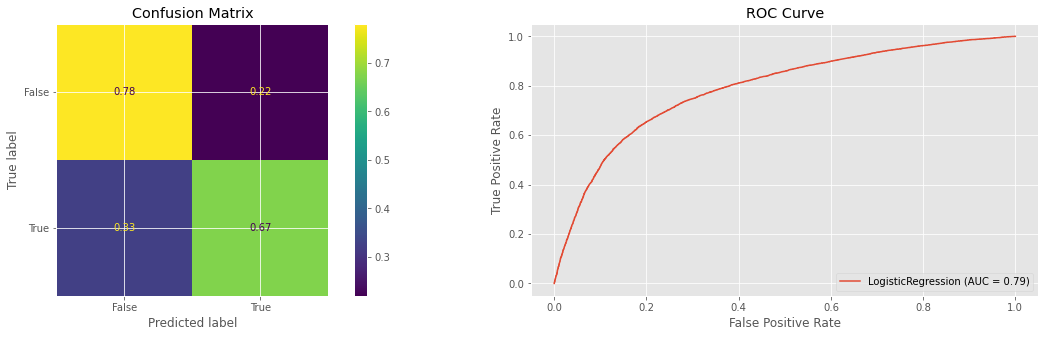

In [265]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

fig = plt.figure(1, figsize=(20, 5))

chart_1 = fig.add_subplot(121)
chart_2 = fig.add_subplot(122)

plot_confusion_matrix(logreg, X_test_std, y_test, normalize='true', ax=chart_1)
chart_1.set_title('Confusion Matrix')

plot_roc_curve(logreg, X_test_std, y_test, ax=chart_2)
chart_2.set_title('ROC Curve')

plt.show()

## Principal Component Analysis (PCA)

Principal Component Analysis is a data compression technique that can reduce the dimensionality of a data set. It does this by finding the maximum variance in a higher dimensional space and project that onto a new space with fewer dimensions. Although our data set doesn't have a hugh number a features, let's explore what PCA can do for us.

First, we'll define a function that can plot two principal components and a decison boundary. This code was taken from chapter 4 of Python Machine Learning, by Vahid Mirjalili and Sebastian Raschka.

In [266]:
# Chapter 4 of book
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

Below, we'll create a pca classifier with two components and fit the reduced data set to a logistic regression model.

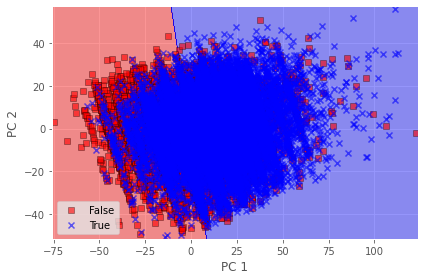

In [267]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
# sc = StandardScaler()
# X_train_std = sc.fit_transform(X_train)
# X_test_std = sc.transform(X_test)

# dimensionality reduction:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# fitting the logistic regression model on the reduced dataset:
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=logreg)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [268]:
pca.explained_variance_ratio_

array([0.55118299, 0.24041201])

Above, we can see that the two components account nearly 80 percent of the variance. The figure though doesn't show a good separation. This could be due to the fact that we need to visualize it in more than 2 dimensions, i.e., run PCA to account for a higher number of components and variance.

Below we output some metrics related to using the reduced dimensionality set in a Logistic Regression model. We see that the accuracy is comparable to the full model created previously. Accuracy is an acceptable metric for a balance data set. However, in the case of medical diagnosis, Recall or Sensitivity is an important metric. It desribes the proportion of patients correctly diagnosed with CVD. If this number is low, patients won't be corretly identified and won't receive the treatment they should.

PCA shows .62 for recall, whereas the previous model is .67. Because of that, I would go with the full model.

In [269]:
y_pred = logreg.predict(X_test_pca)
print('Accuracy of the log reg model on the test data: {:.2f}'.format(logreg.score(X_test_pca, y_test)))

Accuracy of the log reg model on the test data: 0.71


In [270]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.68      0.80      0.74     10429
        True       0.76      0.62      0.69     10564

    accuracy                           0.71     20993
   macro avg       0.72      0.71      0.71     20993
weighted avg       0.72      0.71      0.71     20993



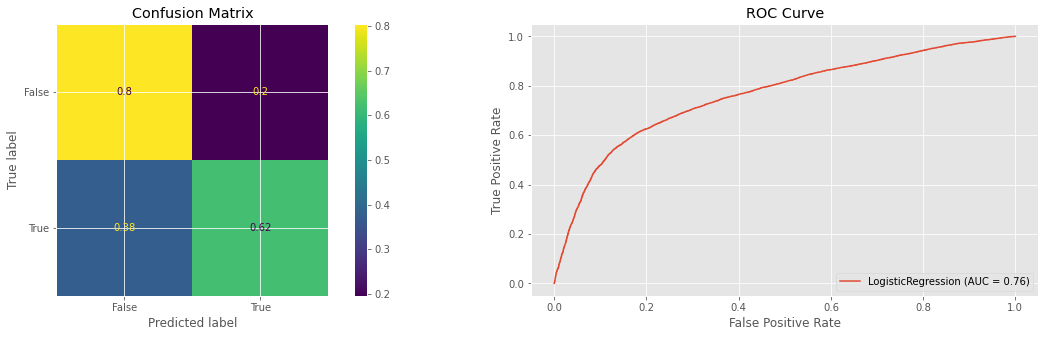

In [271]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

fig = plt.figure(1, figsize=(20, 5))

chart_1 = fig.add_subplot(121)
chart_2 = fig.add_subplot(122)

plot_confusion_matrix(logreg, X_test_pca, y_test, normalize='true', ax=chart_1)
chart_1.set_title('Confusion Matrix')

plot_roc_curve(logreg, X_test_pca, y_test, ax=chart_2)
chart_2.set_title('ROC Curve')

plt.show()

## Linear Discriminant Analysis (LDA)

PCA (unsupervised) does not use the target variable. It attempts to maximize the variance in the feature set. LDA (supervised) can use our target information and maximize the class separability.

Note that LDA will produce N-1 components, where N is the number of classes in our target. So in our case, it would produce 1 components.

We can use the below to generate an LDA feature space and train a logistic regression model against it.

In [272]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

lda = LinearDiscriminantAnalysis()
# sc = StandardScaler()
# X_train_std = sc.fit_transform(X_train)
# X_test_std = sc.transform(X_test)

X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# fitting the logistic regression model on the lda dataset:
logreg = LogisticRegression()
logreg.fit(X_train_lda, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [273]:
y_pred = logreg.predict(X_test_lda)
print('Accuracy of the log reg model on the test data: {:.2f}'.format(logreg.score(X_test_lda, y_test)))

Accuracy of the log reg model on the test data: 0.73


In [274]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.70      0.77      0.74     10429
        True       0.75      0.68      0.71     10564

    accuracy                           0.73     20993
   macro avg       0.73      0.73      0.73     20993
weighted avg       0.73      0.73      0.73     20993



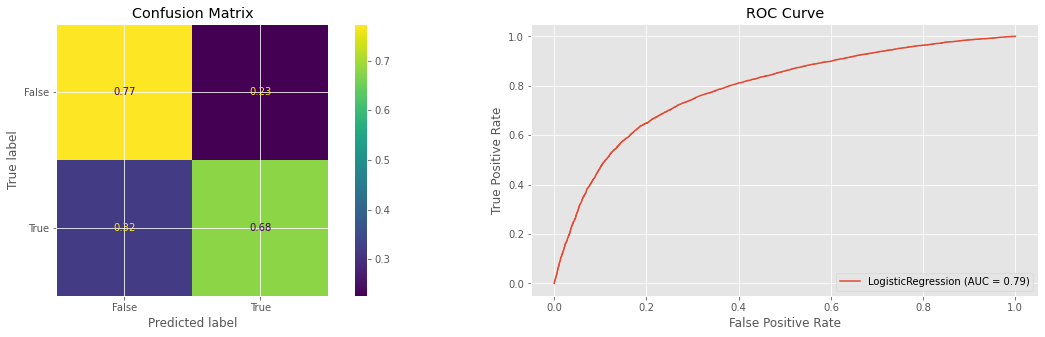

In [275]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

fig = plt.figure(1, figsize=(20, 5))

chart_1 = fig.add_subplot(121)
chart_2 = fig.add_subplot(122)

plot_confusion_matrix(logreg, X_test_lda, y_test, normalize='true', ax=chart_1)
chart_1.set_title('Confusion Matrix')

plot_roc_curve(logreg, X_test_lda, y_test, ax=chart_2)
chart_2.set_title('ROC Curve')

plt.show()

Above we can see that our accuracy increased to .73 using LDA, vs .71 with PCA. Additionally, the AUC value is higher and maybe more importantly, the Recall/Sensitivity value increased to .68. I think this helps demonstrate that LDA did a better job since it was able to use our target information.